In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from src.model import dataset
from src.visualize.basic import plot_count, plot_dimension
from src.visualize.basic import plot_image_histogram, plot_t1_image, plot_t2_image, plot_batch_image
from src.utils import path as path_utils
from src.model import mri_gan

2023-02-17 13:57:39.626283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


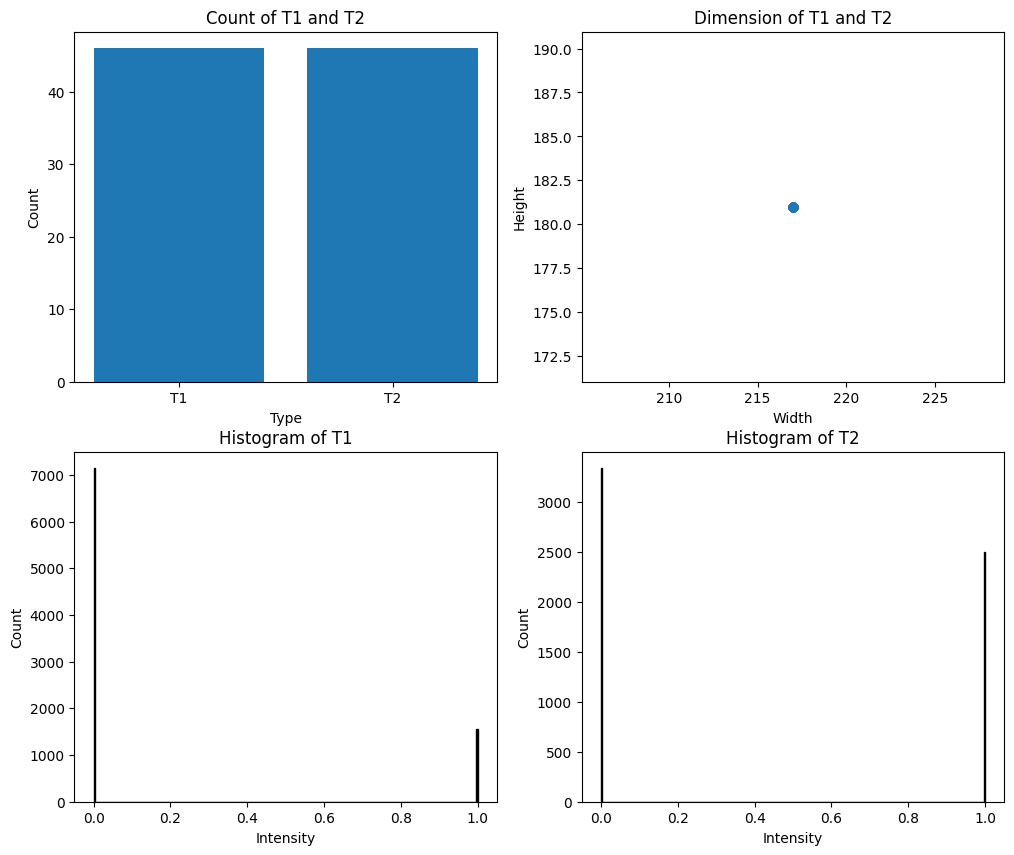

In [2]:
# sub plot for two plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
# plot count
plot_count(ax1)
# plot dimension
plot_dimension(ax2)
# plot image histogram
plot_image_histogram(ax3, ax4)
# show plot
plt.show()

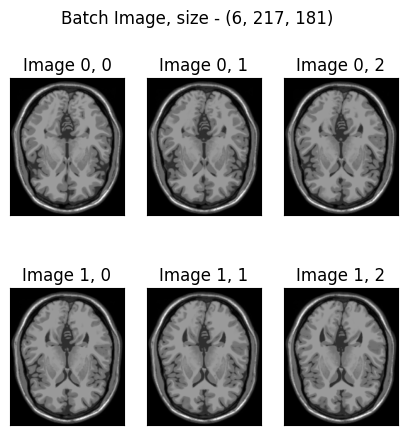

In [3]:
plot_t1_image()

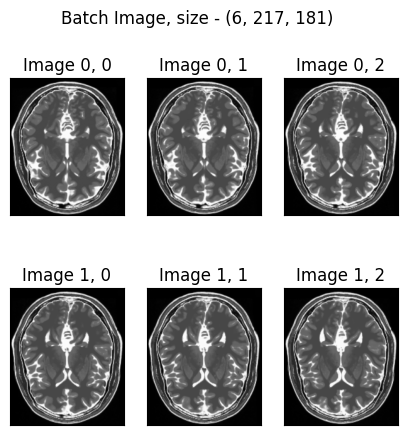

In [4]:
plot_t2_image()

In [5]:
train_dataset = dataset.create_dataset(
    x_paths=path_utils.T1_ALL_IMAGE_PATH,
    y_paths=path_utils.T2_ALL_IMAGE_PATH,
    batch_size=8,
    shuffle=True
)

2023-02-17 13:57:50.901262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 13:57:51.919043: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46705 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:05:00.0, compute capability: 8.6
2023-02-17 13:57:51.921062: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46705 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:06:00.0, compute capability: 8.6


In [6]:
t1, t2 = next(iter(train_dataset))

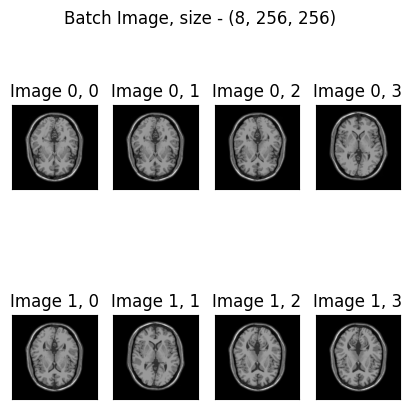

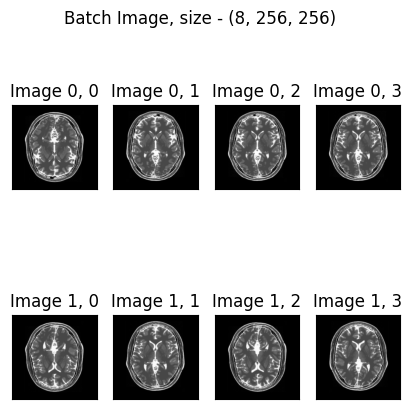

In [7]:
plot_batch_image(t1)
plot_batch_image(t2)

In [8]:
mriGan = mri_gan.MRIGan(
    dataset_pipeline=train_dataset,
    epochs=260,
)

In [9]:
mriGan.init()

Initializing from scratch.


In [10]:
mriGan.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 down_block (DownBlock)         (None, 128, 128, 12  70656       ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 down_block_1 (DownBlock)       (None, 64, 64, 256)  540928      ['down_block[0][0]']             
                                                                                              

 down_block_12 (DownBlock)      (None, 8, 8, 1024)   12846080    ['down_block_11[0][0]']          
                                                                                                  
 down_block_13 (DownBlock)      (None, 4, 4, 1024)   12846080    ['down_block_12[0][0]']          
                                                                                                  
 down_block_14 (DownBlock)      (None, 2, 2, 1024)   12846080    ['down_block_13[0][0]']          
                                                                                                  
 down_block_15 (DownBlock)      (None, 1, 1, 1024)   12846080    ['down_block_14[0][0]']          
                                                                                                  
 up_block_7 (UpBlock)           (None, 2, 2, 1024)   11010048    ['down_block_15[0][0]']          
                                                                                                  
 concatena

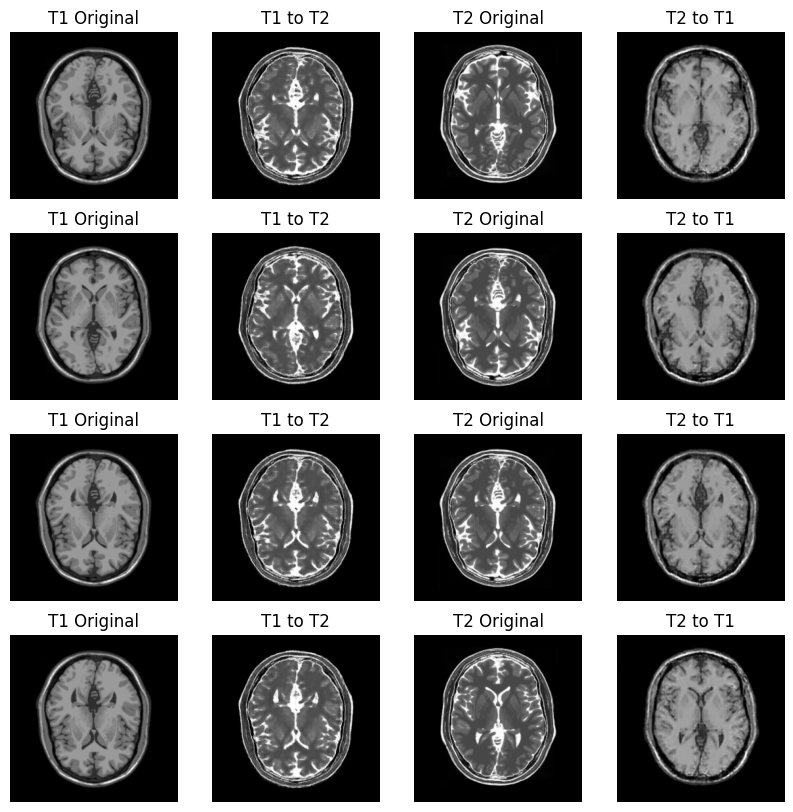

 - time: 22.961568593978882


In [18]:
mriGan.train()

In [6]:
import imageio
import glob
from tqdm import tqdm

In [7]:
filenames = glob.glob('./dowload/images/*.png')

In [4]:
key_extract = lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]) 

In [9]:
filenames = tqdm(sorted(filenames, key=key_extract))


  0%|          | 0/260 [00:00<?, ?it/s]

In [10]:
anim_file = 'cyclegan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_8964/1597251045.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
/tmp/ipykernel_8964/1597251045.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
100%|██████████| 260/260 [00:59<00:00,  4.39it/s]
